In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim




def spiral(size):
    t = np.arange(size)
    u = 0.001
    r0 = 0
    r = r0 + u * t
    
    omega = 2 * np.pi * 0.005
    phi0 = np.pi 
    phi = -omega * t + phi0
    
    x = r * np.cos(phi) 
    y = r * np.sin(phi)
    
    return x, y




class RNN (nn.Module):
    def __init__(self,inputs,hidden,outputs):
        super(RNN,self).__init__()
        self.inputs=inputs
        self.hidden=hidden
        self.outputs=outputs
        self.active=nn.Tanh()
        
        self.input2hidden=nn.Linear(inputs,hidden)
        self.hidden2hidden=nn.Linear(hidden,hidden)
        self.hidden2output=nn.Linear(hidden,outputs)
        
            
    def forward (self,v,H):
        H = self.active(self.input2hidden(v) + self.hidden2hidden(H))
        out = self.active(self.hidden2output(H))
        
        return out


def train (X,Y,epoch,rate,NET,xx,si):
    X = X.float()
    Y = Y.float()
    
    criterion = nn.L1Loss() 
    optimizer = torch.optim.Adam(NET.parameters(),rate) 
    optimizer.zero_grad()
    loss_monit=np.zeros([2,epoch])
    
    H=torch.zeros(1,NET.hidden)
    for i in range(epoch):
        
        
        
        
        
        
        y = NET.forward(X,H)
        loss = criterion(y,Y)
        loss_monit[0,i] = i
        loss_monit[1,i] = loss
        loss.backward()
        optimizer.step()
        optimizer.zero_grad() 
        
    xx = xx.float()
    u = NET.forward(xx,H)
    u = torch.reshape(u,(-1,))
    

    plt.show()
    plt.figure(0)
    plt.plot(xx[0:si].numpy(),xx[si:2*si].numpy())
    plt.title('noised signal')
    plt.figure(1)
    plt.plot(u[0:si].detach().numpy(),u[si:2*si].detach().numpy())
    plt.title('filtered signal')
    weights1 = NET.input2hidden.weight.data
    weights2 = NET.hidden2output.weight.data
    
    return weights1,weights2,loss_monit[0,:],loss_monit[1,:]
    
    
    

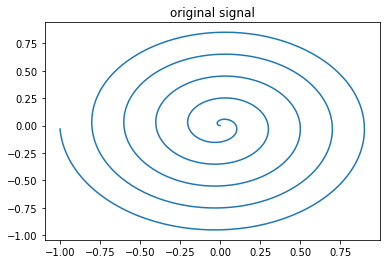

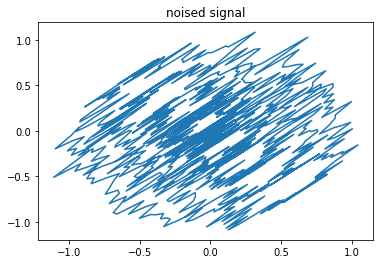

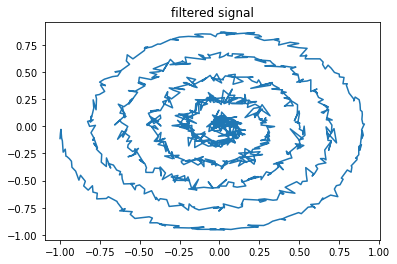

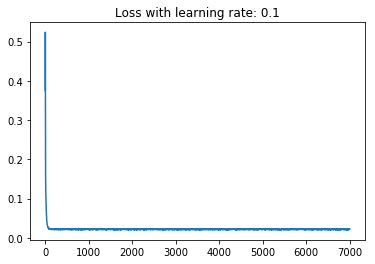

In [58]:
si=1000



noise = np.random.normal(0, 0.1, size=si)
noise=torch.from_numpy(noise)


x1,y1=spiral(si)
x1=torch.from_numpy(x1)
y1=torch.from_numpy(y1)

x1_n=x1+noise
y1_n=y1+noise



X = torch.cat((x1_n,y1_n),0)
Y = torch.cat((x1,y1),0)

noise = np.random.normal(0, 0.1, size=si)
    
noise=torch.from_numpy(noise)


xt,yt=spiral(si)
xt=torch.from_numpy(xt)
yt=torch.from_numpy(yt)

xt_n=xt+noise
yt_n=yt+noise

Xt = torch.cat((xt_n,yt_n),0)

plt.figure(3)
plt.plot(x1[0:si].numpy(),y1[0:si].numpy())
plt.title('original signal')
plt.show()

denoise = RNN(2*si,10,2*si)
z,s,m,n=train (X,Y,7000,0.01,denoise,Xt,si)



plt.figure(3)
plt.plot(m,n)
plt.title('Loss with learning rate: '+str(0.1)) 
plt.show()



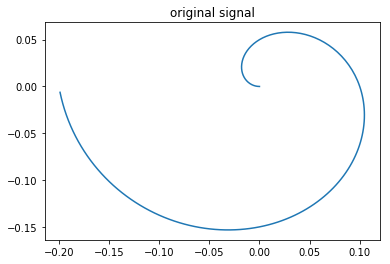

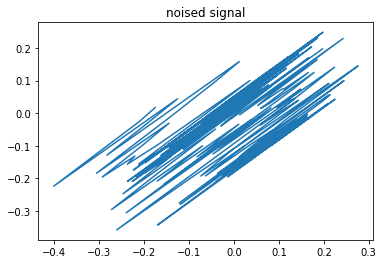

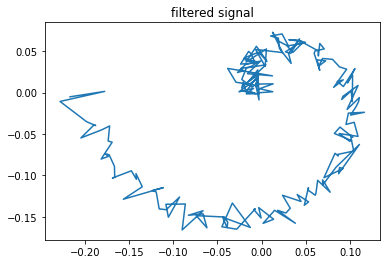

In [48]:
si=1000

#in RNN class,manually,change the xlim and ylim to 0:200 and 200:400 for plotting

noise = np.random.normal(0, 0.01, size=200)
noise=torch.from_numpy(noise)


x1,y1=spiral(si)
x1=torch.from_numpy(x1)
y1=torch.from_numpy(y1)

x1_n=x1[0:200]+noise
y1_n=y1[0:200]+noise



X = torch.cat((x1_n,y1_n),0)
Y = torch.cat((x1[0:200],y1[0:200]),0)

noise = np.random.normal(0, 0.1, size=200)
    
noise=torch.from_numpy(noise)


xt,yt=spiral(si)
xt=torch.from_numpy(xt)
yt=torch.from_numpy(yt)

xt_n=xt[0:200]+noise
yt_n=yt[0:200]+noise

Xt = torch.cat((xt_n,yt_n),0)

plt.figure(3)
plt.plot(x1[0:200].numpy(),y1[0:200].numpy())
plt.title('original signal')
plt.show()

denoise = RNN(400,15,400)
z,s,m,n=train (X,Y,6000,0.01,denoise,Xt,si)





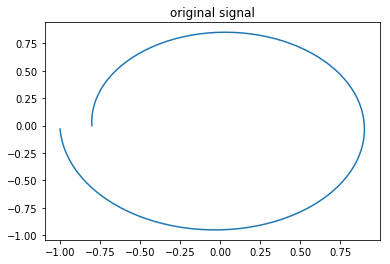

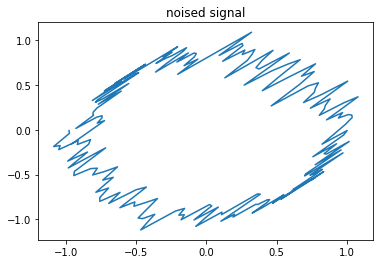

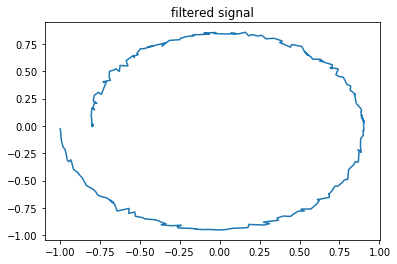

In [49]:
#in RNN class,manually,change the xlim and ylim to 0:200 and 200:400 for plotting

si=1000



noise = np.random.normal(0, 0.01, size=200)
noise=torch.from_numpy(noise)


x1,y1=spiral(si)
x1=torch.from_numpy(x1)
y1=torch.from_numpy(y1)

x1_n=x1[800:1000]+noise
y1_n=y1[800:1000]+noise



X = torch.cat((x1_n,y1_n),0)
Y = torch.cat((x1[800:1000],y1[800:1000]),0)

noise = np.random.normal(0, 0.1, size=200)
    
noise=torch.from_numpy(noise)


xt,yt=spiral(si)
xt=torch.from_numpy(xt)
yt=torch.from_numpy(yt)

xt_n=xt[800:1000]+noise
yt_n=yt[800:1000]+noise

Xt = torch.cat((xt_n,yt_n),0)

plt.figure(3)
plt.plot(x1[800:1000].numpy(),y1[800:1000].numpy())
plt.title('original signal')
plt.show()

denoise = RNN(400,15,400)
z,s,m,n=train (X,Y,6000,0.01,denoise,Xt,si)





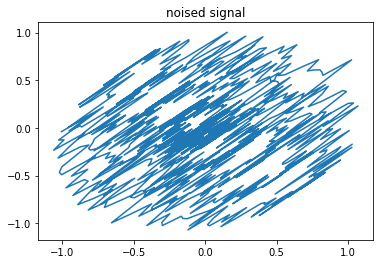

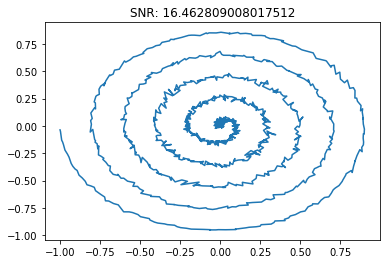

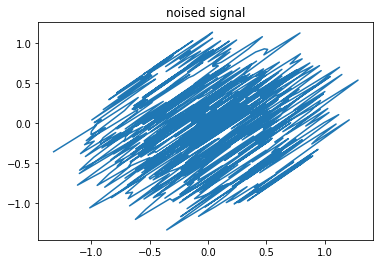

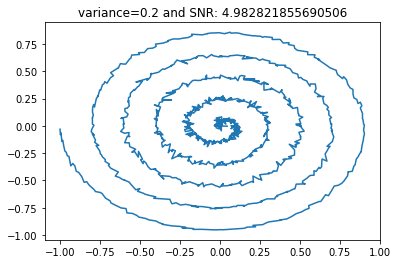

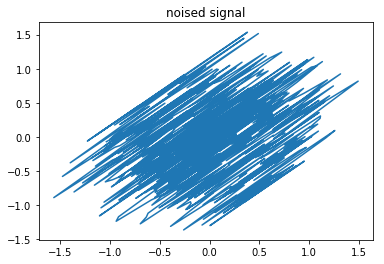

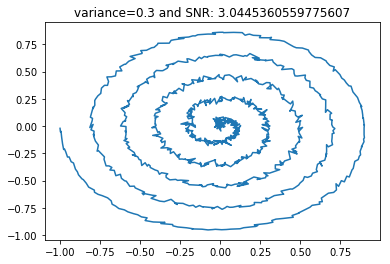

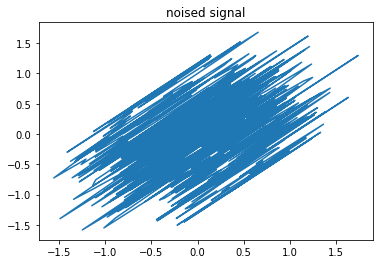

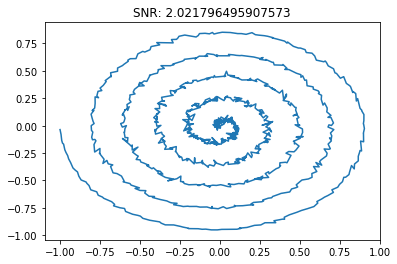

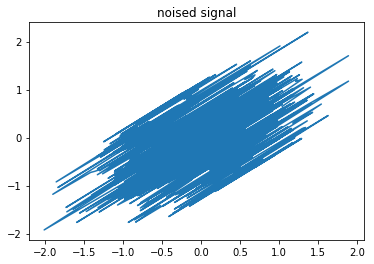

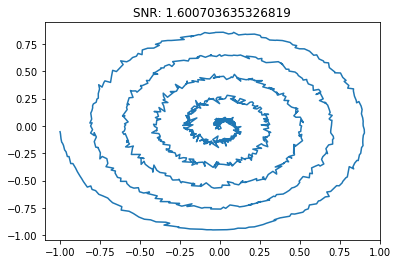

In [4]:
def snr(signal, target):
    #signal = signal[:, 0]
    signal=signal.data.numpy()
    target=target.data.numpy()
    noise = (signal - target)
    p1 = np.sum(signal*signal)
    p2 = np.sum(noise*noise)

    if p2 == 0:
        return 'infinity'
    return p1 / p2




si=1000


noise = np.random.normal(0, 0.01, size=si)
noise=torch.from_numpy(noise)


x1,y1=spiral(si)
x1=torch.from_numpy(x1)
y1=torch.from_numpy(y1)

x1_n=x1+noise
y1_n=y1+noise



X = torch.cat((x1_n,y1_n),0)
Y = torch.cat((x1,y1),0)

noise = np.random.normal(0, 0.1, size=si)
noise=torch.from_numpy(noise)
xt,yt=spiral(si)
xt=torch.from_numpy(xt)
yt=torch.from_numpy(yt)
XT= torch.cat((xt,yt),0)
xt_n=xt+noise
yt_n=yt+noise
Xt = torch.cat((xt_n,yt_n),0)
denoise = RNN(2*si,10,2*si)
z,s,m,n=train (X,Y,6000,0.01,denoise,Xt,si)
plt.title('SNR: '+str(snr(Xt,XT))) 
plt.show()


noise = np.random.normal(0, 0.2, size=si)
noise=torch.from_numpy(noise)
xt,yt=spiral(si)
xt=torch.from_numpy(xt)
yt=torch.from_numpy(yt)
XT= torch.cat((xt,yt),0)
xt_n=xt+noise
yt_n=yt+noise
Xt = torch.cat((xt_n,yt_n),0)
denoise = RNN(2*si,10,2*si)
z,s,m,n=train (X,Y,6000,0.01,denoise,Xt,si)
plt.title('variance=0.2 and SNR: '+str(snr(Xt,XT))) 
plt.show()


noise = np.random.normal(0, 0.3, size=si)
noise=torch.from_numpy(noise)
xt,yt=spiral(si)
xt=torch.from_numpy(xt)
yt=torch.from_numpy(yt)
XT= torch.cat((xt,yt),0)
xt_n=xt+noise
yt_n=yt+noise
Xt = torch.cat((xt_n,yt_n),0)
denoise = RNN(2*si,10,2*si)
z,s,m,n=train (X,Y,6000,0.01,denoise,Xt,si)
plt.title('variance=0.3 and SNR: '+str(snr(Xt,XT))) 
plt.show()


noise = np.random.normal(0, 0.4, size=si)
noise=torch.from_numpy(noise)
xt,yt=spiral(si)
xt=torch.from_numpy(xt)
yt=torch.from_numpy(yt)
XT= torch.cat((xt,yt),0)
xt_n=xt+noise
yt_n=yt+noise
Xt = torch.cat((xt_n,yt_n),0)
denoise = RNN(2*si,10,2*si)
z,s,m,n=train (X,Y,6000,0.01,denoise,Xt,si)
plt.title('SNR: '+str(snr(Xt,XT))) 
plt.show()


noise = np.random.normal(0, 0.5, size=si)
noise=torch.from_numpy(noise)
xt,yt=spiral(si)
xt=torch.from_numpy(xt)
yt=torch.from_numpy(yt)
XT= torch.cat((xt,yt),0)
xt_n=xt+noise
yt_n=yt+noise
Xt = torch.cat((xt_n,yt_n),0)
denoise = RNN(2*si,10,2*si)
z,s,m,n=train (X,Y,6000,0.01,denoise,Xt,si)
plt.title('SNR: '+str(snr(Xt,XT))) 
plt.show()

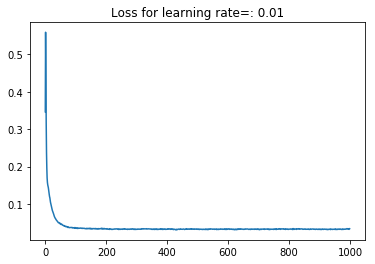

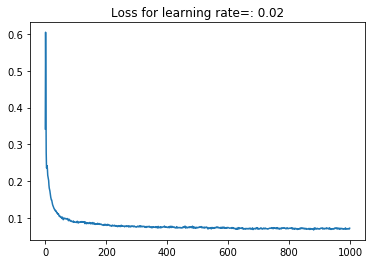

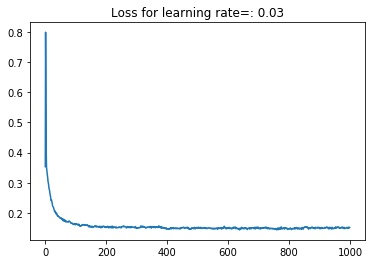

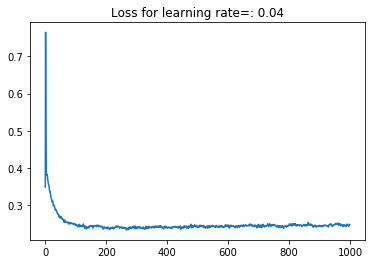

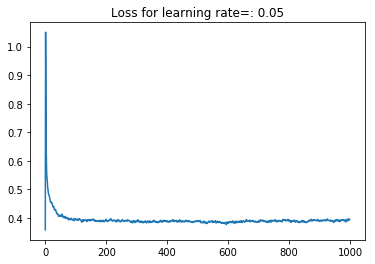

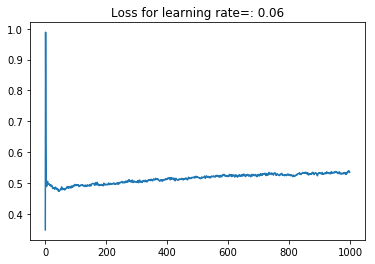

In [65]:
si=1000

net1 = RNN(2*si,30,2*si)
net2 = RNN(2*si,30,2*si)
net3 = RNN(2*si,30,2*si)
net4 = RNN(2*si,30,2*si)
net5 = RNN(2*si,30,2*si)
net6 = RNN(2*si,30,2*si)



noise = np.random.normal(0, 0.01, size=si)
noise=torch.from_numpy(noise)


x1,y1=spiral(si)
x1=torch.from_numpy(x1)
y1=torch.from_numpy(y1)

x1_n=x1+noise
y1_n=y1+noise



X = torch.cat((x1_n,y1_n),0)
Y = torch.cat((x1,y1),0)

noise = np.random.normal(0, 0.1, size=si)
noise=torch.from_numpy(noise)
xt,yt=spiral(si)
xt=torch.from_numpy(xt)
yt=torch.from_numpy(yt)
XT= torch.cat((xt,yt),0)
xt_n=xt+noise
yt_n=yt+noise
Xt = torch.cat((xt_n,yt_n),0)


z,s,m1,n1=train(X, Y, 1000,0.01,net1,Xt,si)
z,s,m2,n2=train(X, Y, 1000,0.02,net2,Xt,si)
z,s,m3,n3=train(X, Y, 1000,0.03,net3,Xt,si)
z,s,m4,n4=train(X, Y, 1000,0.04,net4,Xt,si)
z,s,m5,n5=train(X, Y, 1000,0.05,net5,Xt,si)
z,s,m6,n6=train(X, Y, 1000,0.06,net6,Xt,si)



plt.plot(m1,n1)
plt.title('Loss for learning rate=: '+str(0.01)) 
plt.show()



plt.plot(m2,n2)
plt.title('Loss for learning rate=: '+str(0.02))
plt.show()



plt.plot(m3,n3)
plt.title('Loss for learning rate=: '+str(0.03))
plt.show()



plt.plot(m4,n4)
plt.title('Loss for learning rate=: '+str(0.04)) 
plt.show()


plt.plot(m5,n5)
plt.title('Loss for learning rate=: '+str(0.05)) 
plt.show()


plt.plot(m6,n6)
plt.title('Loss for learning rate=: '+str(0.06)) 
plt.show()


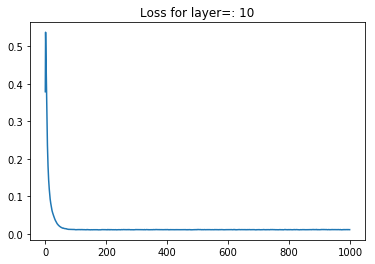

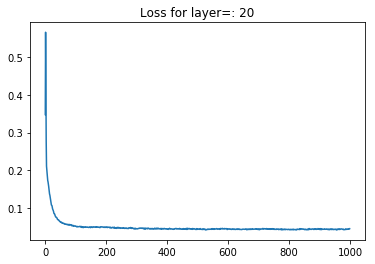

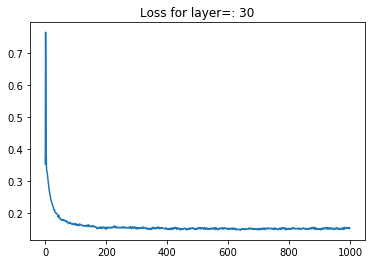

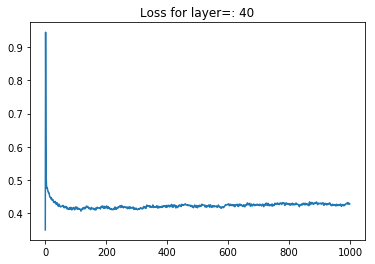

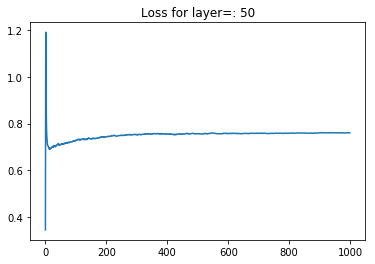

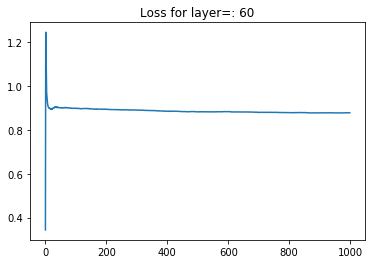

In [68]:
si=1000

net1 = RNN(2*si,10,2*si)
net2 = RNN(2*si,20,2*si)
net3 = RNN(2*si,30,2*si)
net4 = RNN(2*si,40,2*si)
net5 = RNN(2*si,50,2*si)
net6 = RNN(2*si,60,2*si)



noise = np.random.normal(0, 0.01, size=si)
noise=torch.from_numpy(noise)


x1,y1=spiral(si)
x1=torch.from_numpy(x1)
y1=torch.from_numpy(y1)

x1_n=x1+noise
y1_n=y1+noise



X = torch.cat((x1_n,y1_n),0)
Y = torch.cat((x1,y1),0)

noise = np.random.normal(0, 0.1, size=si)
noise=torch.from_numpy(noise)
xt,yt=spiral(si)
xt=torch.from_numpy(xt)
yt=torch.from_numpy(yt)
XT= torch.cat((xt,yt),0)
xt_n=xt+noise
yt_n=yt+noise
Xt = torch.cat((xt_n,yt_n),0)


z,s,m1,n1=train(X, Y, 1000,0.01,net1,Xt,si)
z,s,m2,n2=train(X, Y, 1000,0.02,net2,Xt,si)
z,s,m3,n3=train(X, Y, 1000,0.03,net3,Xt,si)
z,s,m4,n4=train(X, Y, 1000,0.04,net4,Xt,si)
z,s,m5,n5=train(X, Y, 1000,0.05,net5,Xt,si)
z,s,m6,n6=train(X, Y, 1000,0.06,net6,Xt,si)



plt.plot(m1,n1)
plt.title('Loss for layer=: '+str(10)) 
plt.show()



plt.plot(m2,n2)
plt.title('Loss for layer=: '+str(20))
plt.show()



plt.plot(m3,n3)
plt.title('Loss for layer=: '+str(30))
plt.show()



plt.plot(m4,n4)
plt.title('Loss for layer=: '+str(40)) 
plt.show()


plt.plot(m5,n5)
plt.title('Loss for layer=: '+str(50)) 
plt.show()


plt.plot(m6,n6)
plt.title('Loss for layer=: '+str(60)) 
plt.show()


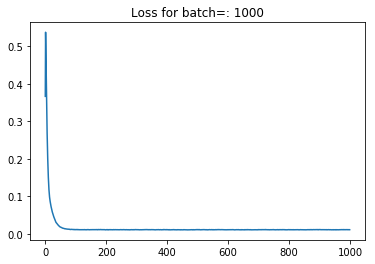

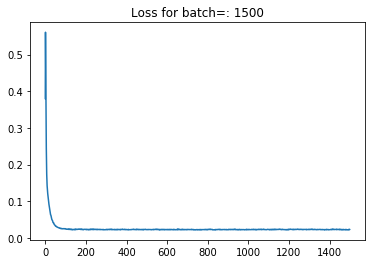

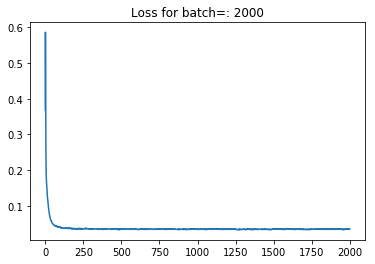

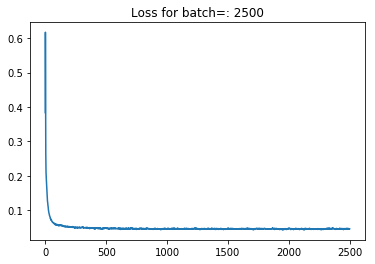

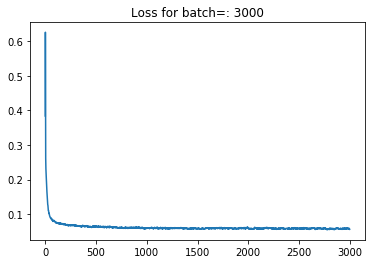

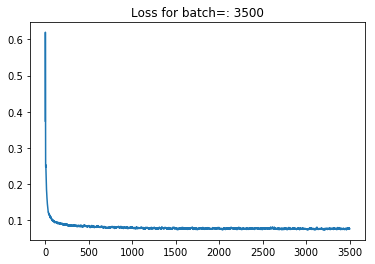

In [71]:
#epoch

si=1000

net1 = RNN(2*si,10,2*si)
net2 = RNN(2*si,10,2*si)
net3 = RNN(2*si,10,2*si)
net4 = RNN(2*si,10,2*si)
net5 = RNN(2*si,10,2*si)
net6 = RNN(2*si,10,2*si)




noise = np.random.normal(0, 0.01, size=si)
noise=torch.from_numpy(noise)


x1,y1=spiral(si)
x1=torch.from_numpy(x1)
y1=torch.from_numpy(y1)

x1_n=x1+noise
y1_n=y1+noise



X = torch.cat((x1_n,y1_n),0)
Y = torch.cat((x1,y1),0)

noise = np.random.normal(0, 0.1, size=si)
noise=torch.from_numpy(noise)
xt,yt=spiral(si)
xt=torch.from_numpy(xt)
yt=torch.from_numpy(yt)
XT= torch.cat((xt,yt),0)
xt_n=xt+noise
yt_n=yt+noise
Xt = torch.cat((xt_n,yt_n),0)


z,s,m1,n1=train(X, Y, 1000,0.01,net1,Xt,si)
z,s,m2,n2=train(X, Y, 1500,0.02,net2,Xt,si)
z,s,m3,n3=train(X, Y, 2000,0.03,net3,Xt,si)
z,s,m4,n4=train(X, Y, 2500,0.04,net4,Xt,si)
z,s,m5,n5=train(X, Y, 3000,0.05,net5,Xt,si)
z,s,m6,n6=train(X, Y, 3500,0.06,net6,Xt,si)



plt.plot(m1,n1)
plt.title('Loss for batch=: '+str(1000)) 
plt.show()



plt.plot(m2,n2)
plt.title('Loss for batch=: '+str(1500)) 
plt.show()



plt.plot(m3,n3)
plt.title('Loss for batch=: '+str(2000)) 
plt.show()



plt.plot(m4,n4)
plt.title('Loss for batch=: '+str(2500))  
plt.show()


plt.plot(m5,n5)
plt.title('Loss for batch=: '+str(3000)) 
plt.show()


plt.plot(m6,n6)
plt.title('Loss for batch=: '+str(3500)) 
plt.show()


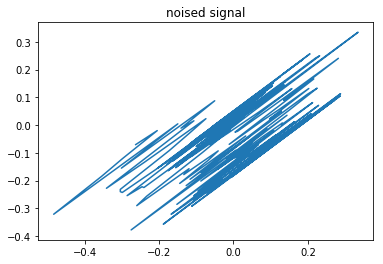

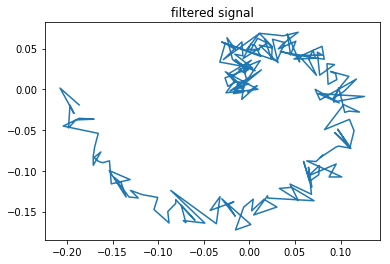

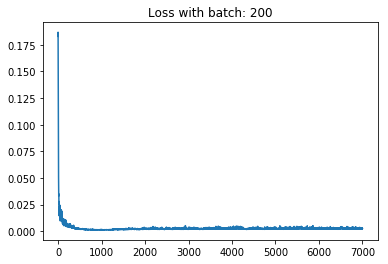

In [7]:
si=200



noise = np.random.normal(0, 0.1, size=si)
noise=torch.from_numpy(noise)


x1,y1=spiral(si)
x1=torch.from_numpy(x1)
y1=torch.from_numpy(y1)

x1_n=x1+noise
y1_n=y1+noise



X = torch.cat((x1_n,y1_n),0)
Y = torch.cat((x1,y1),0)

noise = np.random.normal(0, 0.1, size=si)
    
noise=torch.from_numpy(noise)


xt,yt=spiral(si)
xt=torch.from_numpy(xt)
yt=torch.from_numpy(yt)

xt_n=xt+noise
yt_n=yt+noise

Xt = torch.cat((xt_n,yt_n),0)



denoise = RNN(2*si,10,2*si)
z,s,m,n=train (X,Y,7000,0.01,denoise,Xt,si)



plt.figure(3)
plt.plot(m,n)
plt.title('Loss with batch: '+str(200)) 
plt.show()



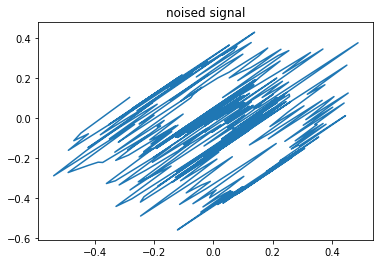

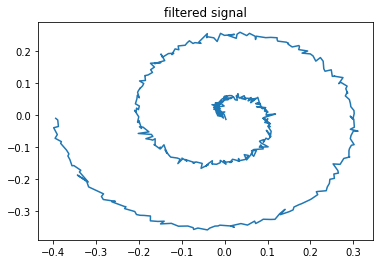

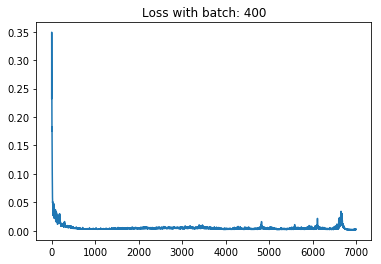

In [8]:
si=400



noise = np.random.normal(0, 0.1, size=si)
noise=torch.from_numpy(noise)


x1,y1=spiral(si)
x1=torch.from_numpy(x1)
y1=torch.from_numpy(y1)

x1_n=x1+noise
y1_n=y1+noise



X = torch.cat((x1_n,y1_n),0)
Y = torch.cat((x1,y1),0)

noise = np.random.normal(0, 0.1, size=si)
    
noise=torch.from_numpy(noise)


xt,yt=spiral(si)
xt=torch.from_numpy(xt)
yt=torch.from_numpy(yt)

xt_n=xt+noise
yt_n=yt+noise

Xt = torch.cat((xt_n,yt_n),0)



denoise = RNN(2*si,10,2*si)
z,s,m,n=train (X,Y,7000,0.01,denoise,Xt,si)



plt.figure(3)
plt.plot(m,n)
plt.title('Loss with batch: '+str(400)) 
plt.show()



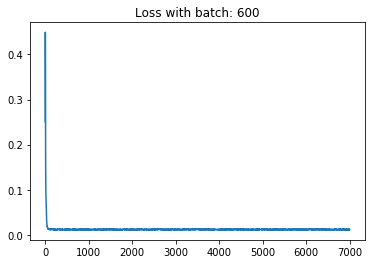

In [74]:
si=600



noise = np.random.normal(0, 0.1, size=si)
noise=torch.from_numpy(noise)


x1,y1=spiral(si)
x1=torch.from_numpy(x1)
y1=torch.from_numpy(y1)

x1_n=x1+noise
y1_n=y1+noise



X = torch.cat((x1_n,y1_n),0)
Y = torch.cat((x1,y1),0)

noise = np.random.normal(0, 0.1, size=si)
    
noise=torch.from_numpy(noise)


xt,yt=spiral(si)
xt=torch.from_numpy(xt)
yt=torch.from_numpy(yt)

xt_n=xt+noise
yt_n=yt+noise

Xt = torch.cat((xt_n,yt_n),0)



denoise = RNN(2*si,10,2*si)
z,s,m,n=train (X,Y,7000,0.01,denoise,Xt,si)



plt.figure(3)
plt.plot(m,n)
plt.title('Loss with batch: '+str(600)) 
plt.show()



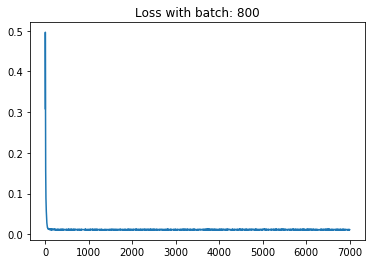

In [75]:
si=800



noise = np.random.normal(0, 0.1, size=si)
noise=torch.from_numpy(noise)


x1,y1=spiral(si)
x1=torch.from_numpy(x1)
y1=torch.from_numpy(y1)

x1_n=x1+noise
y1_n=y1+noise



X = torch.cat((x1_n,y1_n),0)
Y = torch.cat((x1,y1),0)

noise = np.random.normal(0, 0.1, size=si)
    
noise=torch.from_numpy(noise)


xt,yt=spiral(si)
xt=torch.from_numpy(xt)
yt=torch.from_numpy(yt)

xt_n=xt+noise
yt_n=yt+noise

Xt = torch.cat((xt_n,yt_n),0)



denoise = RNN(2*si,10,2*si)
z,s,m,n=train (X,Y,7000,0.01,denoise,Xt,si)



plt.figure(3)
plt.plot(m,n)
plt.title('Loss with batch: '+str(800)) 
plt.show()



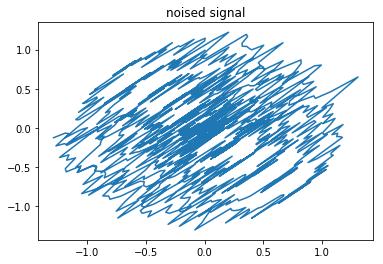

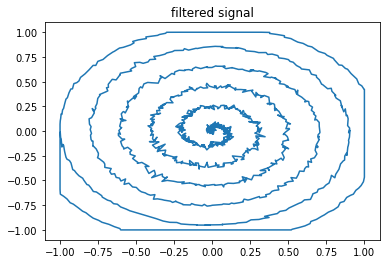

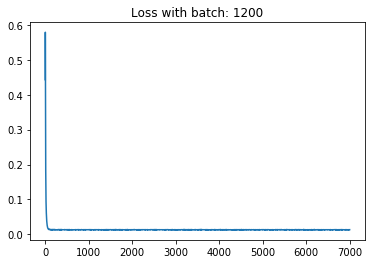

In [9]:
si=1200



noise = np.random.normal(0, 0.1, size=si)
noise=torch.from_numpy(noise)


x1,y1=spiral(si)
x1=torch.from_numpy(x1)
y1=torch.from_numpy(y1)

x1_n=x1+noise
y1_n=y1+noise



X = torch.cat((x1_n,y1_n),0)
Y = torch.cat((x1,y1),0)

noise = np.random.normal(0, 0.1, size=si)
    
noise=torch.from_numpy(noise)


xt,yt=spiral(si)
xt=torch.from_numpy(xt)
yt=torch.from_numpy(yt)

xt_n=xt+noise
yt_n=yt+noise

Xt = torch.cat((xt_n,yt_n),0)



denoise = RNN(2*si,10,2*si)
z,s,m,n=train (X,Y,7000,0.01,denoise,Xt,si)



plt.figure(3)
plt.plot(m,n)
plt.title('Loss with batch: '+str(1200)) 
plt.show()



Text(0.5,1,'hidden to output')

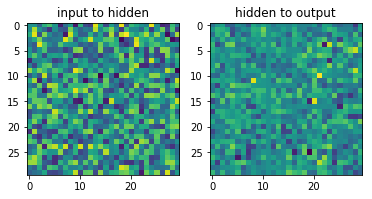

In [82]:
si=15



noise = np.random.normal(0, 0.1, size=si)
noise=torch.from_numpy(noise)


x1,y1=spiral(si)
x1=torch.from_numpy(x1)
y1=torch.from_numpy(y1)

x1_n=x1+noise
y1_n=y1+noise



X = torch.cat((x1_n,y1_n),0)
Y = torch.cat((x1,y1),0)

noise = np.random.normal(0, 0.1, size=si)
    
noise=torch.from_numpy(noise)


xt,yt=spiral(si)
xt=torch.from_numpy(xt)
yt=torch.from_numpy(yt)

xt_n=xt+noise
yt_n=yt+noise

Xt = torch.cat((xt_n,yt_n),0)



denoise = RNN(2*si,30,2*si)
z,s,m,n=train (X,Y,4000,0.01,denoise,Xt,si)



plt.subplot(1,2,1)
plt.imshow(z)
plt.title('input to hidden')
    
plt.subplot(1,2,2)
plt.imshow(s)
plt.title('hidden to output')

